In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-03-19 19:06:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2024-03-19 19:06:06 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
# inspect the data

!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'pizza_steak
There are 2 directories and 0 images in 'pizza_steak/test
There are 0 directories and 250 images in 'pizza_steak/test/pizza
There are 0 directories and 250 images in 'pizza_steak/test/steak
There are 2 directories and 0 images in 'pizza_steak/train
There are 0 directories and 750 images in 'pizza_steak/train/pizza
There are 0 directories and 750 images in 'pizza_steak/train/steak


To visualise our images, lets eget the class names programmatically

In [7]:
# getting classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}") # Show the shape of the image

  return img

['1553353.jpg']
Image shape : (512, 512, 3)


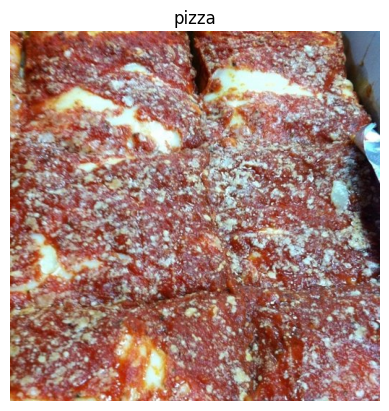

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

array([[[183, 112,  68],
        [173, 102,  58],
        [166,  93,  50],
        ...,
        [ 96, 139, 174],
        [ 96, 140, 175],
        [ 90, 134, 169]],

       [[194, 121,  78],
        [180, 107,  64],
        [164,  89,  47],
        ...,
        [ 93, 136, 171],
        [ 95, 138, 173],
        [ 91, 135, 170]],

       [[199, 124,  82],
        [198, 123,  81],
        [196, 118,  79],
        ...,
        [ 92, 135, 170],
        [ 93, 136, 171],
        [ 94, 137, 172]],

       ...,

       [[199, 148,  91],
        [199, 144,  87],
        [198, 136,  79],
        ...,
        [140,  89,  85],
        [166, 116, 107],
        [187, 139, 127]],

       [[201, 166, 110],
        [196, 157, 100],
        [197, 148,  90],
        ...,
        [164, 100,  88],
        [178, 123, 103],
        [166, 114,  90]],

       [[207, 181, 124],
        [200, 169, 112],
        [200, 160, 101],
        ...,
        [156,  87,  71],
        [177, 120,  93],
        [158, 105,  74]]], dtype=uint8)
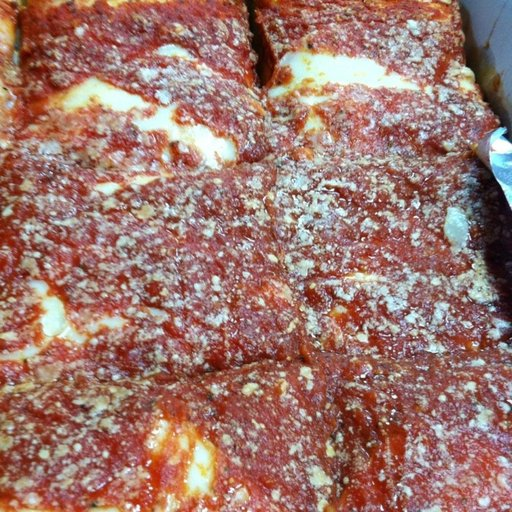

In [10]:
img

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[183, 112,  68],
        [173, 102,  58],
        [166,  93,  50],
        ...,
        [ 96, 139, 174],
        [ 96, 140, 175],
        [ 90, 134, 169]],

       [[194, 121,  78],
        [180, 107,  64],
        [164,  89,  47],
        ...,
        [ 93, 136, 171],
        [ 95, 138, 173],
        [ 91, 135, 170]],

       [[199, 124,  82],
        [198, 123,  81],
        [196, 118,  79],
        ...,
        [ 92, 135, 170],
        [ 93, 136, 171],
        [ 94, 137, 172]],

       ...,

       [[199, 148,  91],
        [199, 144,  87],
        [198, 136,  79],
        ...,
        [140,  89,  85],
        [166, 116, 107],
        [187, 139, 127]],

       [[201, 166, 110],
        [196, 157, 100],
        [197, 148,  90],
        ...,
        [164, 100,  88],
        [178, 123, 103],
        [166, 114,  90]],

       [[207, 181, 124],
        [200, 169, 112],
        [200, 160, 101],
        ...,
        [156,  87,  7

In [12]:
# view the image shape
img.shape

(512, 512, 3)

In [13]:
img/255

array([[[0.71764706, 0.43921569, 0.26666667],
        [0.67843137, 0.4       , 0.22745098],
        [0.65098039, 0.36470588, 0.19607843],
        ...,
        [0.37647059, 0.54509804, 0.68235294],
        [0.37647059, 0.54901961, 0.68627451],
        [0.35294118, 0.5254902 , 0.6627451 ]],

       [[0.76078431, 0.4745098 , 0.30588235],
        [0.70588235, 0.41960784, 0.25098039],
        [0.64313725, 0.34901961, 0.18431373],
        ...,
        [0.36470588, 0.53333333, 0.67058824],
        [0.37254902, 0.54117647, 0.67843137],
        [0.35686275, 0.52941176, 0.66666667]],

       [[0.78039216, 0.48627451, 0.32156863],
        [0.77647059, 0.48235294, 0.31764706],
        [0.76862745, 0.4627451 , 0.30980392],
        ...,
        [0.36078431, 0.52941176, 0.66666667],
        [0.36470588, 0.53333333, 0.67058824],
        [0.36862745, 0.5372549 , 0.6745098 ]],

       ...,

       [[0.78039216, 0.58039216, 0.35686275],
        [0.78039216, 0.56470588, 0.34117647],
        [0.77647059, 0

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our shape
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess the data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size = 3,
                            activation = "relu",
                            input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 181ms/step - loss: 0.5732 - accuracy: 0.6940 - val_loss: 0.4166 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4361 - accuracy: 0.7987 - val_loss: 0.3593 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4112 - accuracy: 0.8147 - val_loss: 0.3422 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3994 - accuracy: 0.8300 - val_loss: 0.3857 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3570 - accuracy: 0.8473 - val_loss: 0.3417 - val_accuracy: 0.8760


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

https://poloclub.github.io/cnn-explainer/

['1826066.jpg']
Image shape : (512, 512, 3)
['398565.jpg']
Image shape : (512, 384, 3)


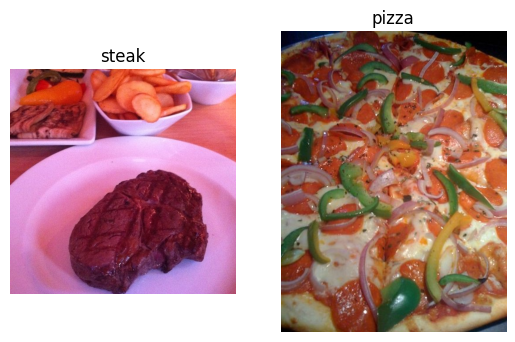

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")

2. Preprocess the data (prepare it for the model)

In [17]:
# Define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next step is to turn our data into batches

A batch is a small dataset of data. Rather than look at 10000 imagesat one time, a model can look at 32 at a time.

In [18]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Load in our image data directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# Get a sample of a train data batch

images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [21]:
# How many batches are there
len(train_data)   # 1500/32

47

3. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a ml model, experimenting, try to beat the baseline

In [22]:
# Make the creating of our model easier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
# Create the model (this will be our baseline, a layer convulational neural network)

model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "same",
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [24]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

In [25]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 484000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486101 (1.85 MB)
Trainable params: 486101 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4. Fit the model

In [26]:
# Check the lengths of the training and test data generators

len(train_data), len(test_data)

(47, 16)

In [27]:
# Fit the model

history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 0.7891 - accuracy: 0.6940 - val_loss: 0.4758 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4516 - accuracy: 0.7953 - val_loss: 0.3920 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3376 - accuracy: 0.8667 - val_loss: 0.4815 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.1981 - accuracy: 0.9307 - val_loss: 0.4815 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.0995 - accuracy: 0.9727 - val_loss: 0.5079 - val_accuracy: 0.8200


In [28]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.3417 - accuracy: 0.8760


[0.34166219830513, 0.8759999871253967]

In [29]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 84ms/step - loss: 0.5079 - accuracy: 0.8200


[0.5079044699668884, 0.8199999928474426]

In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [31]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 484000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486101 (1.85 MB)
Trainable params: 486101 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


5. Evaluating our model

<Axes: >

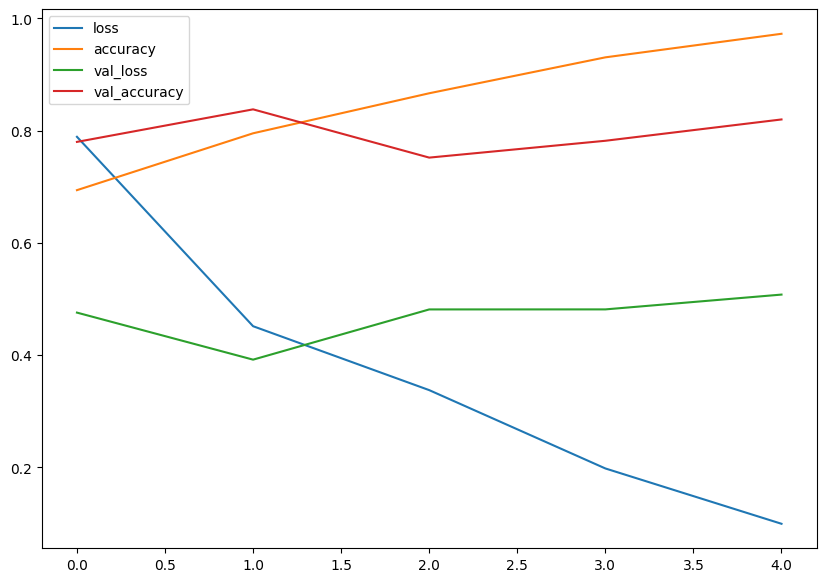

In [32]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [33]:
# Plot the validation and training curves seperately

def plot_loss_curves(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

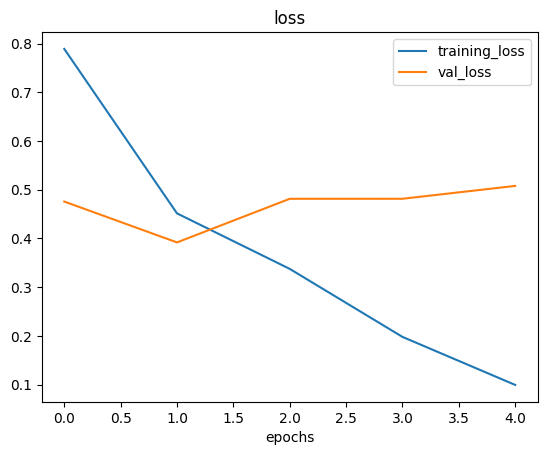

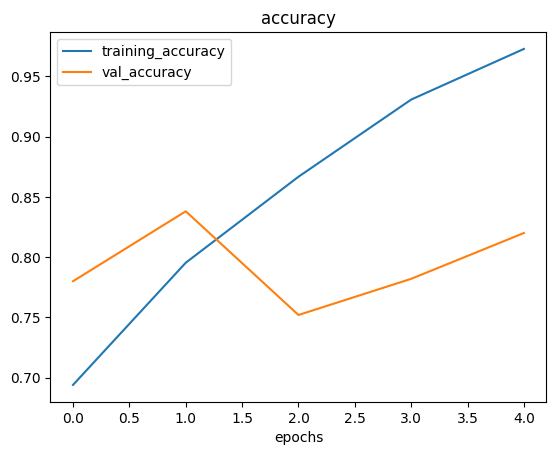

In [34]:
# Check out the loss accuracy of model_4

plot_loss_curves(history_4)

6. Adjust the model paramters

Fitting a machine learning model comes in 3 steps:-

0. Create a baseline model
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer

Reduce overfitting:
- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data

In [35]:
# Create the model (making new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 3),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [36]:
# Compile the model

model_5.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

In [37]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 116ms/step - loss: 0.6125 - accuracy: 0.6627 - val_loss: 0.5026 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4907 - accuracy: 0.7667 - val_loss: 0.4204 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4365 - accuracy: 0.8093 - val_loss: 0.3805 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4238 - accuracy: 0.8127 - val_loss: 0.3383 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.3935 - accuracy: 0.8340 - val_loss: 0.4013 - val_accuracy: 0.8020


In [38]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.4013 - accuracy: 0.8020


[0.4012555480003357, 0.8019999861717224]

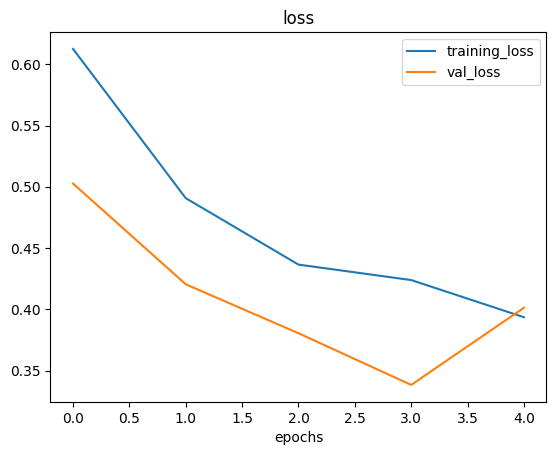

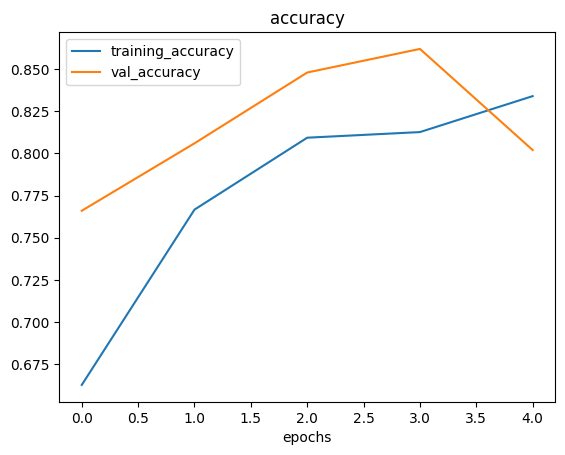

In [39]:
plot_loss_curves(history_5)

Opening our bag of tricks and finding data augmentation

In [40]:
# Create ImageDataGenerator instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               shuffle = False,
                                               seed = 42)

# Create non-augmented train data batches
print("non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Create non-augmented test data batches
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)


Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


In [48]:
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 23s 461ms/step - loss: 0.7992 - accuracy: 0.4847 - val_loss: 0.6841 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6891 - accuracy: 0.5620 - val_loss: 0.6669 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.6805 - accuracy: 0.5533 - val_loss: 0.6217 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 20s 417ms/step - loss: 0.6627 - accuracy: 0.6193 - val_loss: 0.5479 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6157 - accuracy: 0.6593 - val_loss: 0.5165 - val_accuracy: 0.8300


In [49]:
model_6.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.5165 - accuracy: 0.8300


[0.5165189504623413, 0.8299999833106995]

In [50]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 26, 26, 10)       

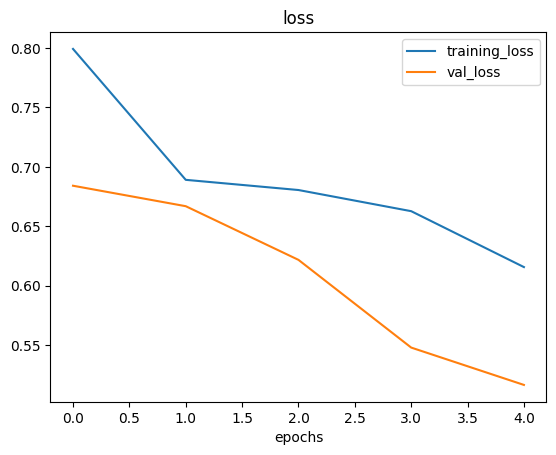

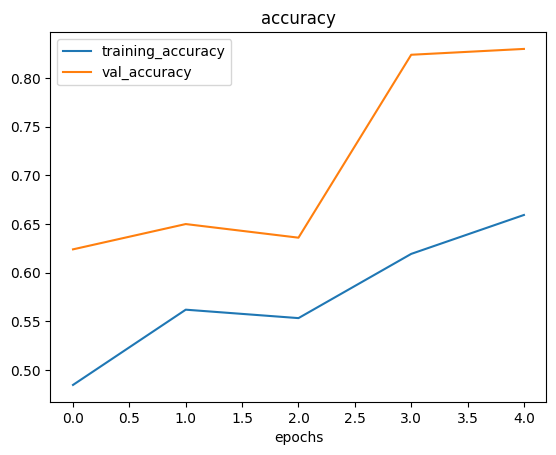

In [51]:
plot_loss_curves(history_6)

In [46]:
# Import data and augment it from training directory
print("Augmented training data with shuffle = True")
train_data_augmented_new = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               shuffle = True,
                                               seed = 42)


Augmented training data with shuffle = True
Found 1500 images belonging to 2 classes.


In [52]:
model_7 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_new,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_new),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 434ms/step - loss: 0.6500 - accuracy: 0.6340 - val_loss: 0.5227 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5477 - accuracy: 0.7247 - val_loss: 0.4524 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 19s 416ms/step - loss: 0.5031 - accuracy: 0.7587 - val_loss: 0.3537 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4766 - accuracy: 0.7793 - val_loss: 0.3392 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 20s 437ms/step - loss: 0.4645 - accuracy: 0.7787 - val_loss: 0.3165 - val_accuracy: 0.8560


In [53]:
model_7.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.3165 - accuracy: 0.8560


[0.316532164812088, 0.8560000061988831]

In [54]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 26, 26, 10)       

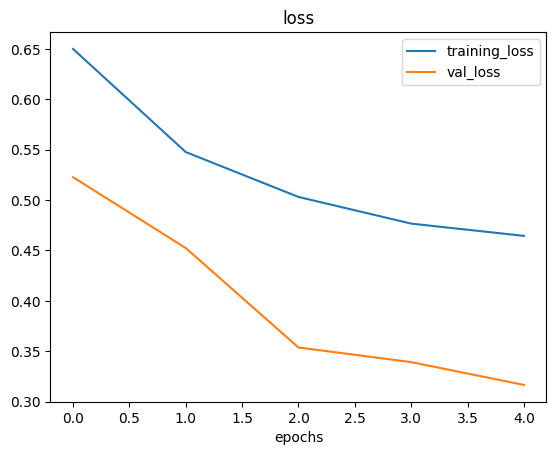

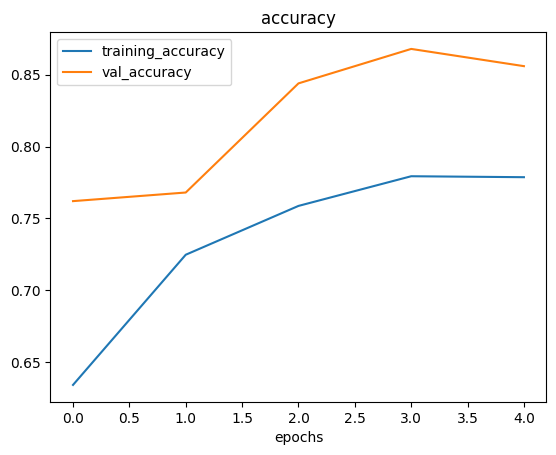

In [55]:
plot_loss_curves(history_7)

7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

- increase the number of model layers
- increase the number of filters in each conv layer
- train for more epochs
- find an ideal learning rate
- get more data
- Use of transfer learning



model_8 is model_1 trained on new augmneted data with shuffle = True

In [57]:
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size = 3,
                            activation = "relu",
                            input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile our CNN
model_8.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_new,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_new),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 443ms/step - loss: 0.6524 - accuracy: 0.6147 - val_loss: 0.5157 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5056 - accuracy: 0.7533 - val_loss: 0.3678 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 30s 627ms/step - loss: 0.4950 - accuracy: 0.7713 - val_loss: 0.3631 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 30s 642ms/step - loss: 0.4756 - accuracy: 0.7807 - val_loss: 0.3596 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 27s 561ms/step - loss: 0.4463 - accuracy: 0.7967 - val_loss: 0.3252 - val_accuracy: 0.8620


In [58]:
model_8.evaluate(test_data)

16/16 [==============================] - 1s 78ms/step - loss: 0.3252 - accuracy: 0.8620


[0.3252045214176178, 0.8619999885559082]

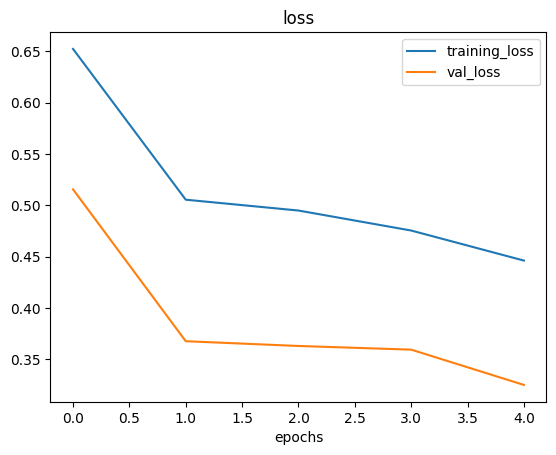

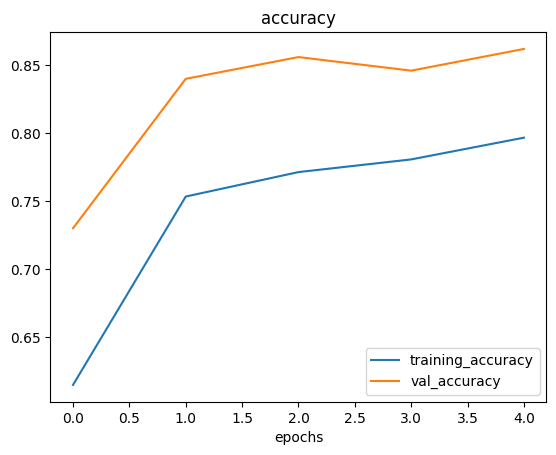

In [59]:
plot_loss_curves(history_8)

--2024-03-19 19:34:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2024-03-19 19:34:17 (56.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



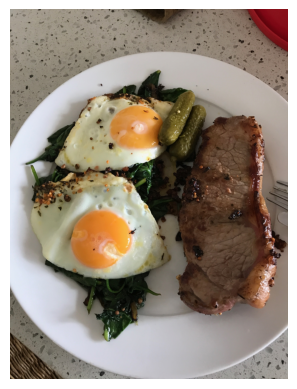

In [60]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [61]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [62]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 486ms/step


array([[0.8858415]], dtype=float32)

In [64]:
model_8.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 211ms/step


array([[0.9487269]], dtype=float32)

In [65]:
model_4.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 296ms/step


array([[0.86759925]], dtype=float32)

In [67]:
# Index on predicted class by rounding the prediction probability
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred_class = class_names[int(tf.round(pred))]
pred_class

1/1 [==============================] - 0s 19ms/step


'steak'

In [69]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


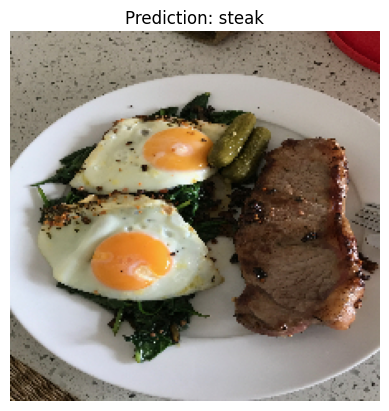

In [70]:
pred_and_plot(model_7, "03-steak.jpeg")

Multi-class Image Classification

1. Become with the data
2. Preprocess the data (get it ready for a model)
3. Fit the model (overfit it to make sure it works)
4. Evaluate the model
6. Adjust different hyperparameters and imporve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [72]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-03-19 20:07:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  55.3MB/s    in 6.7s    

2024-03-19 20:07:12 (73.5 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [73]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [74]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2759414.jpg']
Image shape : (512, 512, 3)


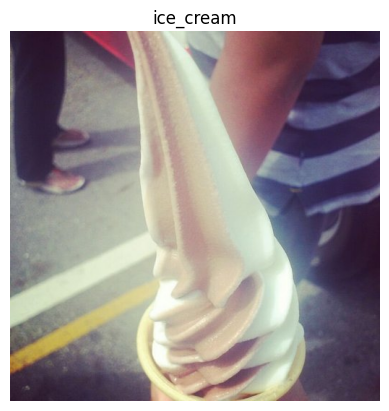

In [84]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

2. Preprocess the data

In [85]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [86]:
# Load in our image data directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3. Create a model - similar to cnn website

In [89]:
from tensorflow.keras.losses import CategoricalCrossentropy

model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_9.compile(loss = CategoricalCrossentropy(),
                optimizer = "adam",
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 124ms/step - loss: 2.1131 - accuracy: 0.2252 - val_loss: 1.9449 - val_accuracy: 0.3044
Epoch 2/5
235/235 [==============================] - 41s 173ms/step - loss: 1.8363 - accuracy: 0.3639 - val_loss: 1.8933 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.5333 - accuracy: 0.4844 - val_loss: 1.8658 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 1.0512 - accuracy: 0.6537 - val_loss: 2.1850 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.5269 - accuracy: 0.8379 - val_loss: 2.8833 - val_accuracy: 0.2928


In [90]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 2.8833 - accuracy: 0.2928


[2.8832650184631348, 0.29280000925064087]

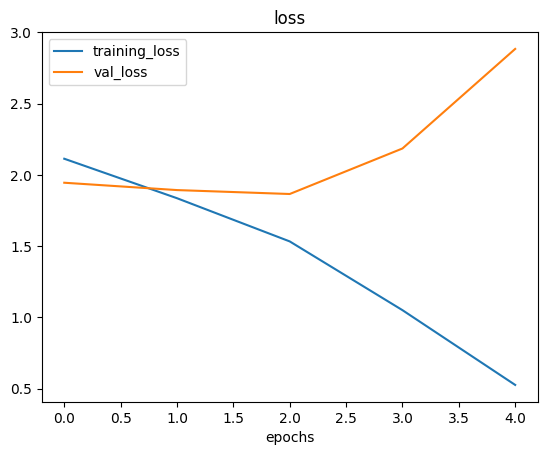

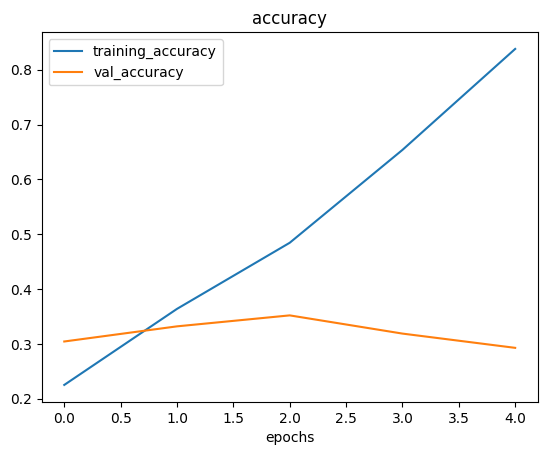

In [91]:
plot_loss_curves(history_9)

Model is overfitting on the training set
, Unable to generalize


6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [92]:
model_10 = Sequential([
    # Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    # Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_10.compile(loss = CategoricalCrossentropy(),
                optimizer = "adam",
                metrics = ["accuracy"])

history_10 = model_10.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 148ms/step - loss: 2.1377 - accuracy: 0.2461 - val_loss: 2.0012 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.8153 - accuracy: 0.3783 - val_loss: 1.9324 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.4721 - accuracy: 0.5097 - val_loss: 2.0745 - val_accuracy: 0.2956
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 1.0319 - accuracy: 0.6697 - val_loss: 2.2186 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.5914 - accuracy: 0.8240 - val_loss: 2.6167 - val_accuracy: 0.3008


In [93]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 2.6167 - accuracy: 0.3008


[2.6166725158691406, 0.30079999566078186]

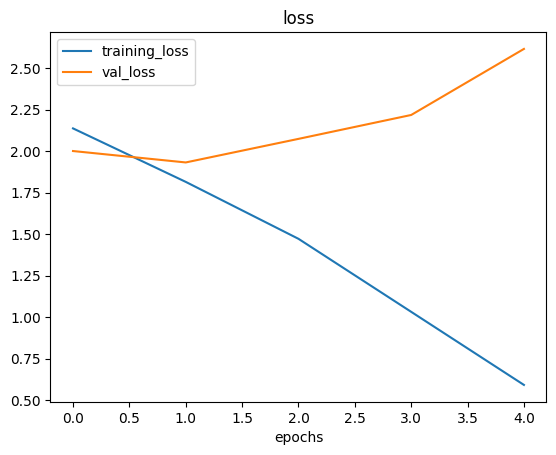

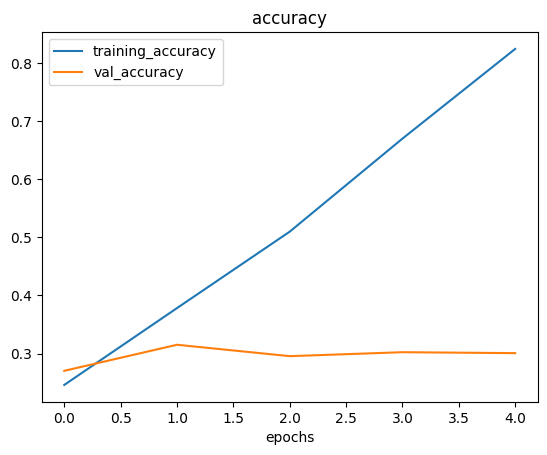

In [94]:
plot_loss_curves(history_10)

In [99]:
model_1.save("model_1.h5")
model_7.save("model_7.h5")
model_8.save("model_8.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
loaded_model_11 = tf.keras.models.load_model("model_8")
# loaded_model_11.evaluate(test_data)

In [103]:
# # Save the model
# # model_1.save('my_model.h5')

# # Mount Google Drive
# from google.colab import drive
# drive.mount('https://drive.google.com/drive/folders/1Fx9wv2l99Y0my5QnelIBFO5a47AuXqUO?usp=drive_link')

# # Copy the model file to Google Drive
# from shutil import copyfile
# copyfile('my_model.h5', 'https://drive.google.com/drive/folders/1Fx9wv2l99Y0my5QnelIBFO5a47AuXqUO?usp=drive_link/model_7.h5')

# # Get a shareable link for the model file
# from google.colab import files
# files.view('https://drive.google.com/drive/folders/1Fx9wv2l99Y0my5QnelIBFO5a47AuXqUO?usp=drive_link/model_7.h5')